# Exercício 12

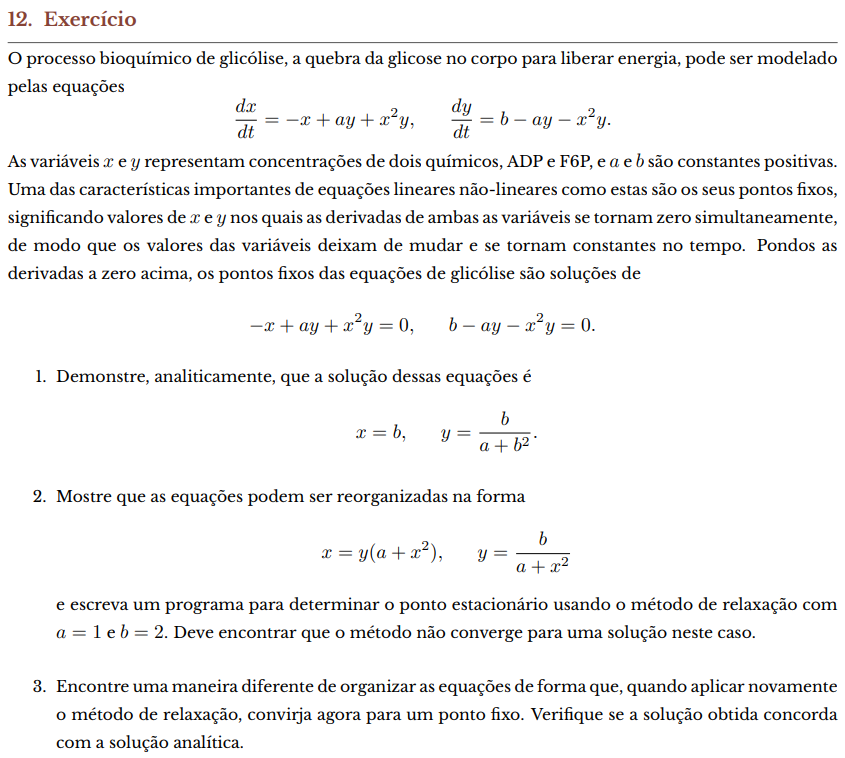

In [44]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Alínea 1

Temos que:
$$
\begin{align*}

\begin{cases}

-x + ay + x^2y = 0
\\\\

b - ay - x^2 y = 0

\end{cases} &\hArr
\begin{cases}

-x + ay + (b - ay) = 0
\\\\

b - ay = x^2 y

\end{cases}
\\\\

&\hArr 
\begin{cases}

x = b
\\\\

y(b^2 + a) - b = 0

\end{cases}
\\\\

&\hArr
\begin{cases}

x = b
\\\\

y = \frac{b}{a + b^2}

\end{cases}

\end{align*}
$$

## Alínea 2

Podemos escrever as equações como:

$$
\begin{align*}

\begin{cases}

-x + ay + x^2y = 0
\\\\

b - ay - x^2 y = 0

\end{cases} &\hArr
\begin{cases}

x = y(a + x^2)
\\\\

y(a + x^2) = b

\end{cases}
\\\\

&\hArr 
\begin{cases}

x = y(a + x^2)
\\\\

y = \frac{b}{a + x^2}

\end{cases}

\end{align*}
$$

In [45]:
def relax(func: Callable, x0: np.ndarray, eps: float = 10e-6, itermax: int=1000) -> float:
    """
        Resolve o sistema de equações definido por `func(x) = x` usando o método da relaxação começando com a estimativa `x0` e parando quando o erro for menor que `eps`.

        O erro é medido como sendo a distância entre duas estimativas consecutivas.

        Se o 

        ### Argumentos
        func: Uma função que aceita um array de `N` elementos e devolve um array de `N` elementos.

        x0: Um array de `N` elementos a usar como primeira estimativa

        eps: Erro máximo permitido pelo método

        itermax: Número máximo de iterações. Se for ultrapassado o método levanta uma exceção.


        ### Retorno
        O valor x que é solução da equação.
    """

    
    i = 0
    erro = eps + 1
    while abs(erro) > eps:
        x1 = func(x0)

        # Estimar o erro
        erro = np.linalg.norm(x1 - x0)

        # Próximo passo
        x0 = x1
        i += 1

        if i > itermax:
            raise ValueError
    
    return x0


def sistema2(xx: np.ndarray) -> np.ndarray:
    """
        Define o sistema de equações do problema 12.2
    """

    a, b = 1, 2
    x, y = xx[0], xx[1]
    return np.array([y * (a + x**2), b / (a + x**2)])


# Resolver o sistema
try:
    x, y = relax(sistema2, np.array([0, 0]))
    print(x, y)
except ValueError:
    print("Solução não encontrada!")

Solução não encontrada!


## Alínea 3

Vamos tentar reescrever a equação de outra forma:

$$
\begin{align*}

\begin{cases}

-x + ay + x^2y = 0
\\\\

b - ay - x^2 y = 0

\end{cases} &\hArr
\begin{cases}

x = y(a + x^2)
\\\\

y(a + x^2) = b

\end{cases}
\\\\

&\hArr 
\begin{cases}

y = \frac{x}{a+x^2}
\\\\

x^2 = \frac by - a

\end{cases}

\end{align*}
$$

Como $x$ e $y$ representam concentrações de dois químicos, podemos usar apenas a raiz positiva de $x$:

$$
\begin{align*}

\begin{cases}

x = \sqrt{\frac by - a}
\\\\

y = \frac{x}{a+x^2}

\end{cases}

\end{align*}
$$

In [46]:
def sistema2(xx: np.ndarray) -> np.ndarray:
    """
        Define o sistema de equações do problema 12.3
    """

    a, b = 1, 2
    x, y = xx[0], xx[1]
    return np.array([np.sqrt((b / y) - a), x / (a + x**2)])


# Resolver o sistema
try:
    x, y = relax(sistema2, np.array([0.1, 0.1]))
    print(f"Solução é x = {x:.3f} e y = {y:.3f}")
except ValueError:
    print("Solução não encontrada!")

Solução é x = 2.000 e y = 0.400


Vamos comparar com a solução analítica:

In [47]:
a, b = 1, 2
x, y = b, b / (a + b**2)
print(f"Solução é x = {x:.3f} e y = {y:.3f}")

Solução é x = 2.000 e y = 0.400
